In [1]:
import sys
sys.path.insert(0, '..')

## 1. Reading an H5 file
After integrating the data, the *Digital Typhoon* data is stored as H5 files. Thus, being able to interact with H5 files becomes essential. The library provides several options.

As a toy example we will use the sequence `197906`

In [2]:
path_to_file = '../sampledata/197906.h5'

### 1.1 First steps
Method `read_h5file` retrieves the data from the specified H5 file and stores the different fields in a dictionary.

In [3]:
from pyphoon.io.h5 import read_h5file
data = read_h5file(path_to_file)

/Users/lucasrodes/NII/pyphoon/.env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In our case, the H5 files have four different fields: 
- `X`: Sequence of image frames.
- `X_ids`: Identifiers corresponding to the image frames.
- `Y`: Best track data of the sequence.
- `Y_ids`: Identifiers corresponding to the best track data.

In [4]:
# Print the keys
for k in data.keys():
    print(k)

X
X_ids
Y
Y_ids


### 1.2 Using TyphoonSequence
The library provides a more effective manner of loading typhoon sequences, namely the method `read_typhoonlist_h5`. In particular, this method loads the data from an H5 file as an instance of class `TyphoonList`, which provides useful features. 

In [5]:
from pyphoon.io import read_typhoonlist_h5
sequence = read_typhoonlist_h5(path_to_file)

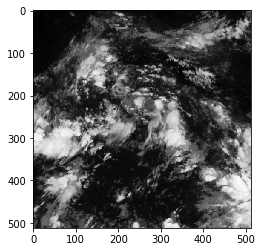

In [6]:
# Plot image
import matplotlib.pyplot as plt
plt.imshow(sequence.images[0], cmap="Greys")
plt.show()

## 2. Interacting with TyphoonSequence
Once a sequence is loaded, several things can be done. The main attribuets of TyphoonSequence are:

- `images`: Array containing all images within a sequence
- `images_ids`: Ids of the frames in `images`. Ids have the structure *typhoonId_YYYYMMDDHH*.
- `best`: Array containing all best track data within a sequence
- `best_ids`: Ids of the samples in `best`. Ids have the structure *typhoonId_YYYYMMDDHH*.

*Note: Lenght of `images` and length of `best` might difer, as there might be some temporal gaps withouth satellite images! In the case of sequence `197906`, the missmatch is high, as back in the days the observation frequency of images was of 3h instead of 1h!*

In [7]:
print("Number of image data:", len(sequence.images))
print("Number of best track data:", len(sequence.best))

Number of image data: 73
Number of best track data: 217


Finally, let us visualize the sequence frames. This is done by using the `DisplaySequence` object. To use this on a Notebook, we employ `HTML` from `IPython.display`.

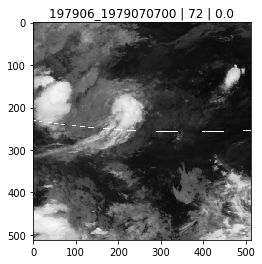

In [8]:
# TODO: No idea why there are two plots
from pyphoon.utils import DisplaySequence
from IPython.display import HTML

HTML(DisplaySequence(
    typhoon_sequence=sequence,
    name="197906",
    interval=100,
).run_html())